# Cálculo simbólico en Python

In [1]:
import sympy as sym

In [2]:
x = sym.Symbol("x")
y = sym.Symbol("y")

In [3]:
expanded_expr = sym.expand((x + y) ** 3)
expanded_expr

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [4]:
simplified_expr = sym.simplify(x**2 + x - x**2)
simplified_expr

x

In [5]:
derivative_expr = sym.diff(x**3, x)
derivative_expr

3*x**2

# Serie de Taylor

In [41]:
from typing import Callable
import sympy as sym
from IPython.display import display


def taylor_approx(*, fcn: Callable[[float], float], x0: float, n: int) -> sym.Symbol:
    """Approximate a function using the Taylor nth polynomial.
    ## Parameters
    ``fcn``: function to approximate
    ``x0``: point to approximate around
    ``n``: number of terms in the approximation
    ## Return
    ``taylor``: the Taylor nth polynomial
    """
    x = sym.symbols("x")
    f = sym.sympify(fcn(x))
    taylor: sym.Symbol = 0
    for i in range(n + 1):
        taylor += f.diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0) ** i
        # display(taylor)

    return taylor

# Examples

In [42]:
fcn = lambda x: 1 / (1 - x)
taylor_approx(fcn=fcn, x0=0, n=5)

x**5 + x**4 + x**3 + x**2 + x + 1

In [43]:
# from math import cos # no
from sympy import cos

fcn = lambda x: cos(x)

taylor_approx(fcn=fcn, x0=0, n=3)

1 - x**2/2

In [44]:
fcn = lambda x: x**3 - 10 * x**2 + 6
taylor_approx(fcn=fcn, x0=3, n=3)

-33*x + (x - 3)**3 - (x - 3)**2 + 42

In [45]:
# from math import exp # no
from sympy import exp

fcn = lambda x: exp(x)
taylor_approx(fcn=fcn, x0=0, n=5)

x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1

In [46]:
# from math import exp # no
from sympy import exp

fcn = lambda x: 1 / exp(x) ** 2
taylor_approx(fcn=fcn, x0=0, n=5)

-4*x**5/15 + 2*x**4/3 - 4*x**3/3 + 2*x**2 - 2*x + 1

In [47]:
# from math import exp # no
from sympy import log

fcn = lambda x: log(x)
taylor_approx(fcn=fcn, x0=1, n=3)

x + (x - 1)**3/3 - (x - 1)**2/2 - 1

1th Taylor Polynomial:


2 - x

2th Taylor Polynomial:


-x + (x - 1)**2 + 2

3th Taylor Polynomial:


-x - (x - 1)**3 + (x - 1)**2 + 2

4th Taylor Polynomial:


-x + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2

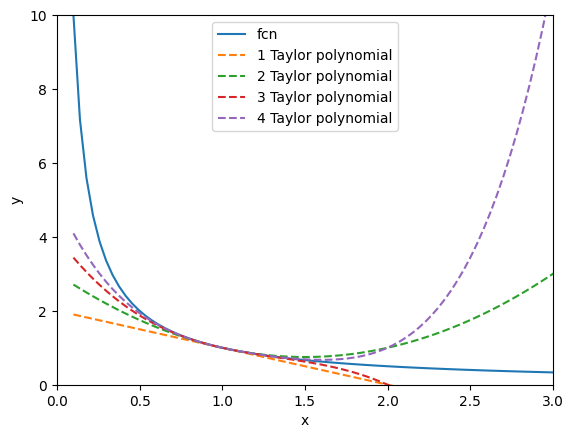

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Define the function fcn
fcn = lambda x: 1 / x
# fcn = lambda x: 1 / (1 - x)
x0 = 1

# Define the range of x values
x_vals = np.linspace(0.1, 4, 100)

# Plot the function fcn
plt.plot(x_vals, fcn(x_vals), label="fcn")

# Plot the first 4 approximations using the Taylor series
for n in range(1, 5):
    approx = taylor_approx(fcn=fcn, x0=x0, n=n)
    print(f"{n}th Taylor Polynomial:")
    display(approx)
    plt.plot(
        x_vals,
        [approx.subs(x, val) for val in x_vals],
        "--",
        label=f"{n} Taylor polynomial",
    )

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.ylim(0, 10)
plt.xlim(0, 3)
# Show the plot
plt.show()

1th Taylor Polynomial:


x/2 - 1/2 + pi/4

2th Taylor Polynomial:


x/2 - (x - 1)**2/4 - 1/2 + pi/4

3th Taylor Polynomial:


x/2 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4

4th Taylor Polynomial:


x/2 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4

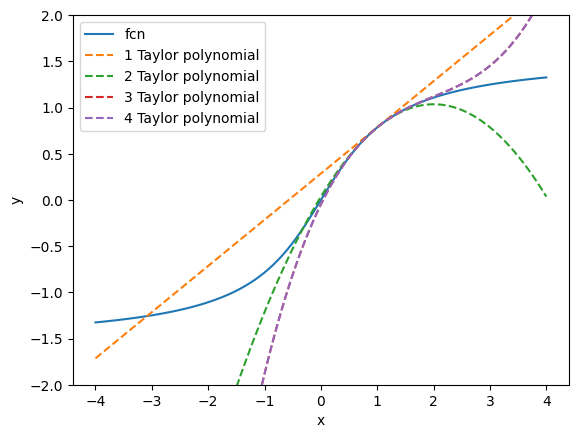

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sympy import atan

# Define the function fcn
fcn = lambda x: atan(x)
# fcn = lambda x: 1 / (1 - x)
x0 = 1

# Define the range of x values
x_vals = np.linspace(-4, 4, 100)

# Plot the function fcn
plt.plot(x_vals, [fcn(x) for x in x_vals], label="fcn")

# Plot the first 4 approximations using the Taylor series
for n in range(1, 5):
    approx = taylor_approx(fcn=fcn, x0=x0, n=n)
    print(f"{n}th Taylor Polynomial:")
    display(approx)
    plt.plot(
        x_vals,
        [approx.subs(x, val) for val in x_vals],
        "--",
        label=f"{n} Taylor polynomial",
    )

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.ylim(-2, 2)
# plt.xlim(0, 3)
# Show the plot
plt.show()

# Polinomios de Lagrange

In [63]:
def lagrange_approx(*, xs: list[float], ys: list[float]) -> sym.Symbol:
    """Approximate a set of points using Lagrange polynomials.

    ## Parameters
    ``x``: list of x values
    ``y``: list of y values

    ## Return
    ``lagrange``: the Lagrange polynomial

    """

    x = sym.symbols("x")
    lagrange: sym.Symbol = sym.S.Zero

    # -- Summation of the Lagrange polynomials
    for i in range(len(xs)):

        # -- Calculation of the Lagrange polynomial
        term = sym.S.One
        for j in range(len(xs)):
            if i != j:
                term *= (x - xs[j]) / (xs[i] - xs[j])
        term = sym.expand(term)
        lagrange += term * ys[i]

    return lagrange

In [64]:
lagrange_approx(xs=[1, 2, 3], ys=[1, 4, 9])

x**2

In [65]:
xs = [2, 2.75, 4]
eqn = lambda x: 1 / x
ys = [eqn(x) for x in xs]
lagrange_approx(xs=xs, ys=ys)

0.0454545454545454*x**2 - 0.397727272727272*x + 1.11363636363636

In [66]:
xs = [1, 2, 3]
ys = [1, 2, 2]
lagrange_approx(xs=xs, ys=ys)

-x**2/2 + 5*x/2 - 1

In [67]:
from sympy import sqrt


xs = [0, 30, 60, 90]


ys = [0, 0.5, sqrt(3) / 2, 1]


r = lagrange_approx(xs=xs, ys=ys)


r

1.54320987654321e-5*x**3 - 0.00194444444444444*x**2 + 0.0611111111111111*x + sqrt(3)*(-x**3/54000 + x**2/450 - x/20)/2

In [68]:
r.subs(x, 51).evalf()

0.776120649827263

In [69]:
data = [(-2, 5), (1, 7), (3, 11), (7, 34)]
xs = [x for x, _ in data]
ys = [y for _, y in data]
r2 = lagrange_approx(xs=xs, ys=ys)
r2

43*x**3/1080 + 101*x**2/540 + 793*x/1080 + 1087/180

In [70]:
r2.subs(x, 0).evalf()

6.03888888888889

In [71]:
1087 / 180

6.038888888888889

In [72]:
from scipy.interpolate import lagrange

lagrange(xs, ys)

poly1d([0.03981481, 0.18703704, 0.73425926, 6.03888889])

[0.5 3. ]
[2.0, 0.3333333333333333]


2.33333333333333 - 0.666666666666667*x

[0.5  1.75 3.  ]
[2.0, 0.5714285714285714, 0.3333333333333333]


0.380952380952381*x**2 - 2.0*x + 2.90476190476191

[0.5        1.33333333 2.16666667 3.        ]
[2.0, 0.7499999999999999, 0.46153846153846145, 0.3333333333333333]


-0.230769230769231*x**3 + 1.61538461538462*x**2 - 3.83974358974359*x + 3.5448717948718

[0.5   1.125 1.75  2.375 3.   ]
[2.0, 0.8888888888888888, 0.5714285714285714, 0.42105263157894735, 0.3333333333333333]


0.142578668894459*x**4 - 1.24756335282651*x**3 + 4.0879977722083*x**2 - 6.17933723196882*x + 4.21470342522974

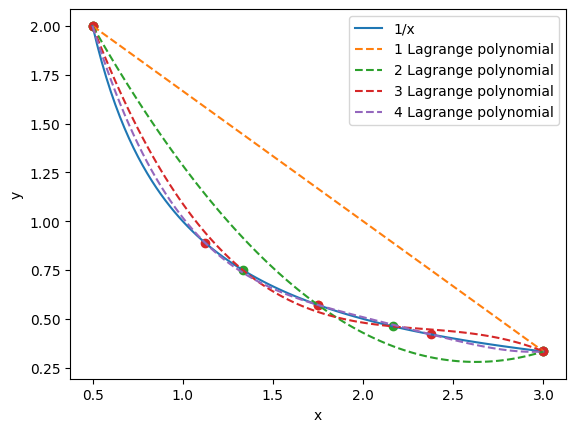

In [75]:
# eqn = lambda x: 1 / (25 * x**2 + 1)
eqn = lambda x: 1 / x
# eqn = lambda x: sin(x) * x

rango = [0.5, 3]
# rango = [-1, 1]

x_vals = np.linspace(rango[0], rango[1], 100)
plt.plot(x_vals, [eqn(x_i) for x_i in x_vals], label="1/x")

for n in range(1, 5):
    xs = np.linspace(rango[0], rango[1], n + 1)
    print(xs)

    ys = [eqn(x) for x in xs]
    print(ys)

    r = lagrange_approx(xs=xs, ys=ys)
    display(r)
    # print(r, end="\n\n")
    plt.scatter(xs, ys, label="")

    xp = np.linspace(rango[0], rango[1], 100)
    yp = [r.subs(x, val) for val in xp]

    plt.plot(xp, yp, "--", label=f"{n} Lagrange polynomial")


# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
# plt.ylim(0, 100)
# plt.xlim(0, 3)
# Show the plot
plt.show()

[-4.  4.]
[-1.3258176636680326, 1.3258176636680326]


0.331454415917008*x

[-4.  0.  4.]
[-1.3258176636680326, 0.0, 1.3258176636680326]


0.331454415917008*x

[-4.         -1.33333333  1.33333333  4.        ]
[-1.3258176636680326, -0.9272952180016123, 0.9272952180016121, 1.3258176636680326]


-0.0255949451426391*x**3 - 2.77555756156289e-17*x**2 + 0.740973538199234*x + 1.38777878078145e-17

[-4. -2.  0.  2.  4.]
[-1.3258176636680326, -1.1071487177940904, 0.0, 1.1071487177940904, 1.3258176636680326]


8.67361737988404e-19*x**4 - 0.0185099952483364*x**3 - 1.04083408558608e-17*x**2 + 0.627614339890391*x

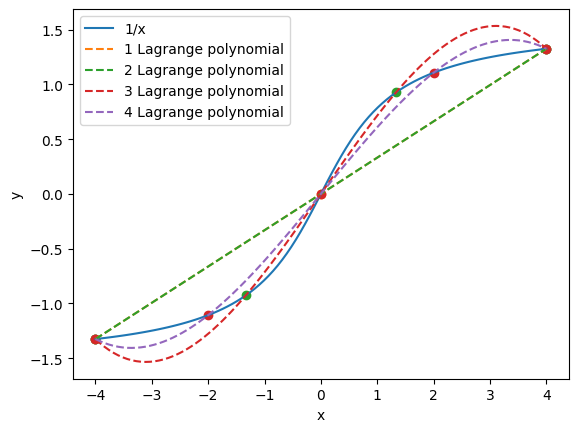

In [77]:
# eqn = lambda x: 1 / (25 * x**2 + 1)
from math import atan

eqn = lambda x: atan(x)
# eqn = lambda x: sin(x) * x

rango = [-4, 4]
# rango = [-1, 1]

x_vals = np.linspace(rango[0], rango[1], 100)
plt.plot(x_vals, [eqn(x_i) for x_i in x_vals], label="1/x")

for n in range(1, 5):
    xs = np.linspace(rango[0], rango[1], n + 1)
    print(xs)

    ys = [eqn(x) for x in xs]
    print(ys)

    r = lagrange_approx(xs=xs, ys=ys)
    display(r)
    # print(r, end="\n\n")
    plt.scatter(xs, ys, label="")

    xp = np.linspace(rango[0], rango[1], 100)
    yp = [r.subs(x, val) for val in xp]

    plt.plot(xp, yp, "--", label=f"{n} Lagrange polynomial")


# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
# plt.ylim(0, 100)
# plt.xlim(0, 3)
# Show the plot
plt.show()